In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing all the datasets as dataframes
ev_maker = pd.read_csv("EV Maker by Place.csv")
ev_cat = pd.read_csv("ev_cat_01-24.csv")
ev_sales = pd.read_csv("ev_sales_by_makers_and_cat_15-24.csv")
op_pcs = pd.read_csv("OperationalPC.csv")
veh_class = pd.read_csv("Vehicle Class - All.csv")

# Data Cleaning and Preprocessing

**Cleaning EV maker by place dataset**

In [3]:
ev_maker.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [4]:
'''
There are no numerical values in this dataframe
And there are also no null values. The dataset is already clean.
'''
ev_maker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


**Cleaning EV Categoery Dataset**

In [5]:
ev_cat.shape

(284, 17)

In [6]:
ev_cat.isna().sum()

Date                               0
FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0
TWO WHEELER(T)                     0
dtype: int64

In [7]:
ev_cat.min(numeric_only = True)

FOUR WHEELER (INVALID CARRIAGE)    0
HEAVY GOODS VEHICLE                0
HEAVY MOTOR VEHICLE                0
HEAVY PASSENGER VEHICLE            0
LIGHT GOODS VEHICLE                0
LIGHT MOTOR VEHICLE                0
LIGHT PASSENGER VEHICLE            0
MEDIUM GOODS VEHICLE               0
MEDIUM PASSENGER VEHICLE           0
MEDIUM MOTOR VEHICLE               0
OTHER THAN MENTIONED ABOVE         0
THREE WHEELER(NT)                  0
TWO WHEELER (INVALID CARRIAGE)     0
THREE WHEELER(T)                   0
TWO WHEELER(NT)                    0
TWO WHEELER(T)                     0
dtype: int64

In [8]:
ev_cat.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0


In [9]:
ev_cat.drop(index = 0, inplace = True)
ev_cat.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
5,01/01/05,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


In [10]:
ev_cat.describe()

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.342756,2.169611,0.515901,28.731449,44.964664,637.208481,80.590106,0.109541,2.742049,0.173145,26.816254,5.293286,0.445230,6829.268551,8158.611307,47.558304
std,1.225834,12.068930,1.025695,79.088549,132.271583,1673.564172,237.983315,0.410864,10.360209,1.235578,67.653593,11.189004,2.073046,13720.345383,21546.263739,130.132199
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.500000,28.500000,86.500000,24.000000,0.000000,0.000000,0.000000,18.500000,3.000000,0.000000,7634.500000,1433.500000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


**Looking for Outliers**

In [11]:
#Looking for outliers
q1 = ev_cat['TWO WHEELER(NT)'].quantile(0.25)
q3 = ev_cat['TWO WHEELER(NT)'].quantile(0.75)
iqr = q3 - q1

low = q1 - 1.5*iqr
high = q3 + 1.5*iqr

outliers = ev_cat[(ev_cat['TWO WHEELER(NT)'] < low) | (ev_cat['TWO WHEELER(NT)'] > high)] 
outliers.index

ev_cat.drop(index = outliers.index, inplace = True)
ev_cat.reset_index(inplace = True)
ev_cat.drop(columns = 'index')

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
1,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
2,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
3,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
4,01/01/05,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,01/12/15,0,0,0,0,4,70,35,0,0,0,8,0,0,1926,138,0
233,01/12/16,1,1,0,0,3,36,4,0,0,0,35,0,0,4289,136,0
234,01/12/17,0,0,0,0,93,60,26,0,0,0,30,6,0,8712,186,3
235,01/12/18,0,0,0,0,27,114,12,1,2,0,52,5,4,12494,3166,0


**Cleaning EV Sales by Makers Dataset**

In [12]:
ev_sales.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [13]:
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cat     1386 non-null   object
 1   Maker   1386 non-null   object
 2   2015    1386 non-null   int64 
 3   2016    1386 non-null   int64 
 4   2017    1386 non-null   int64 
 5   2018    1386 non-null   int64 
 6   2019    1386 non-null   int64 
 7   2020    1386 non-null   int64 
 8   2021    1386 non-null   int64 
 9   2022    1386 non-null   int64 
 10  2023    1386 non-null   int64 
 11  2024    1386 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 130.1+ KB


In [14]:
'''
This Dataset have no null values and negative values.
This dataset is already clean.
'''

ev_sales.min(numeric_only = True)

2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
dtype: int64

**Cleaning Operational PCS Dataset**

In [15]:
op_pcs.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


In [16]:
op_pcs.isna().sum()

State                     0
No. of Operational PCS    0
dtype: int64

In [17]:
'''
This data has no null and negative values.
This is already clean
'''
op_pcs.min(numeric_only = True)

No. of Operational PCS    1
dtype: int64

**Cleaning Vehicle Class Dataset**

In [18]:
veh_class.shape

(16, 2)

In [19]:
veh_class.head()

,Vehicle Class,Total Registration
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"


In [20]:
veh_class.info() #This dataframe has no missing values, it is already clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle Class       16 non-null     object
 1   Total Registration  16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes


# EV Adoption Trends

In [21]:
ev_sales.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [22]:
#Finding the total no.of sales of ev over the years
sales_trend = ev_sales.sum(numeric_only = True)
sales_trend

# year_sales.to_csv(r"C:\Users\cool\OneDrive\Desktop\HVA\Mini Hackathon 2.0\EV Market Dataset\Sales_per_Year.csv")

2015       7752
2016      49249
2017      87019
2018     129763
2019     165786
2020     123770
2021     328854
2022    1020533
2023    1529234
2024     978943
dtype: int64

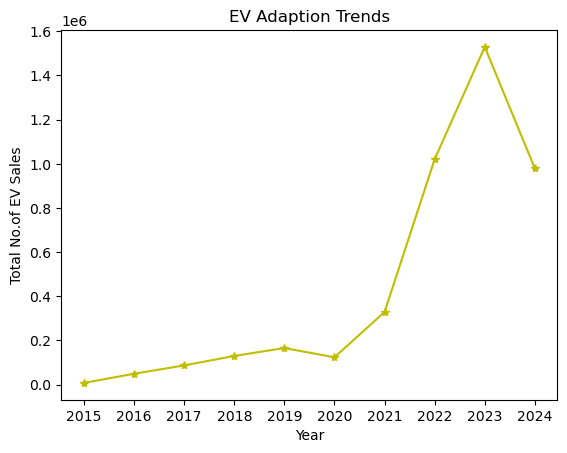

In [23]:
plt.plot(sales_trend, color = 'y', marker = '*')

plt.title('EV Adaption Trends')
plt.xlabel('Year')
plt.ylabel('Total No.of EV Sales')
plt.show()

**Insights:**

* We see the continuous increase in sales of Electric Vehicles over the years.
* This might be because of increased awareness of EV, it's features and also the increased no.of people willing to purchase a vehicle.
* There is decrease in sales of EV on 2020, this might be because of covid-19 situation.
* After that there is continuos increase in sales. The year 2024 has not completed yet, so cannot make any decisions based on this year.


# Manufacturer Performance

In [24]:
ev_sales.head()

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578


In [25]:
#creating a new column to have total no.of sales of each manufacturer

ev_sales['Total Sales'] = ev_sales.iloc[:,2:].sum(numeric_only = True, axis = 1) # axis = 1 to sum the values horizontally

#Total sales column added, to make sure to not include total sales column while summing the values used indexing method 'iloc'

ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0,43
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51,1098
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0,1
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0,2
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578,1069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9,75
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6,70
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5,5


In [26]:
#sorting the ev sales by makers dataframe on total sales in descending order
ev_sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
ev_sales

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales
867,2W,OLA ELECTRIC TECHNOLOGIES PVT LTD,0,0,0,0,0,0,240,109398,267355,211273,588266
1230,2W,TVS MOTOR COMPANY LTD,165,171,69,23,30,233,5258,47182,166580,98516,318227
118,2W,ATHER ENERGY PVT LTD,0,0,0,24,2291,3052,15930,51808,104735,58547,236387
472,2W,HERO ELECTRIC VEHICLES PVT. LTD,1,34,162,5785,11155,8247,46260,97828,29964,2211,201647
864,2W,OKINAWA AUTOTECH PVT LTD,0,1,331,8452,11850,5754,30659,103620,31616,3893,196176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,LMV,G.K. RICKSHAW,0,0,1,0,0,0,0,0,0,0,1
186,2W,BSA MOTORS,1,0,0,0,0,0,0,0,0,0,1
797,3W,MITHU BAJRANG ENG.WORKS,0,0,1,0,0,0,0,0,0,0,1
177,LMV,BIG BULL TRADER PVT LTD,0,0,0,0,0,0,0,0,0,1,1


In [27]:
# Finding the total no.of sales of evs in ev market
sum_of_total_sales = ev_sales['Total Sales'].sum()
sum_of_total_sales

# finding the market share percentage of each maker 
ev_sales['Market Share'] = ev_sales['Total Sales'] * 100 / sum_of_total_sales

# Extracting top 10 makers of evs by their sales
top_10_performers = ev_sales.head(10)
top_10_performers

# exporting ev_sales dataframe to csv file 
# ev_sales.to_csv(r'C:\Users\cool\OneDrive\Desktop\HVA\Mini Hackathon 2.0\EV Market Dataset\ev_sales.csv', index = False)

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total Sales,Market Share
867,2W,OLA ELECTRIC TECHNOLOGIES PVT LTD,0,0,0,0,0,0,240,109398,267355,211273,588266,13.306467
1230,2W,TVS MOTOR COMPANY LTD,165,171,69,23,30,233,5258,47182,166580,98516,318227,7.198235
118,2W,ATHER ENERGY PVT LTD,0,0,0,24,2291,3052,15930,51808,104735,58547,236387,5.347030
472,2W,HERO ELECTRIC VEHICLES PVT. LTD,1,34,162,5785,11155,8247,46260,97828,29964,2211,201647,4.561217
864,2W,OKINAWA AUTOTECH PVT LTD,0,1,331,8452,11850,5754,30659,103620,31616,3893,196176,4.437464
148,2W,BAJAJ AUTO LTD,161,78,43,7,7,1243,4633,25318,71940,73698,177128,4.006602
1357,3W,YC ELECTRIC VEHICLE,1,1665,7434,10816,13213,9543,15793,29793,40794,23892,152944,3.459565
76,2W,AMPERE VEHICLES PRIVATE LIMITED,0,0,0,0,1196,4522,12470,79857,42903,857,141805,3.207603
1020,3W,SAERA ELECTRIC AUTO PVT LTD,140,1203,1532,3226,5080,4153,7098,19314,29321,16408,87475,1.978668
1203,LMV,TATA PASSENGER ELECTRIC MOBILITY LTD,0,0,0,0,0,0,0,0,38580,35830,74410,1.683140


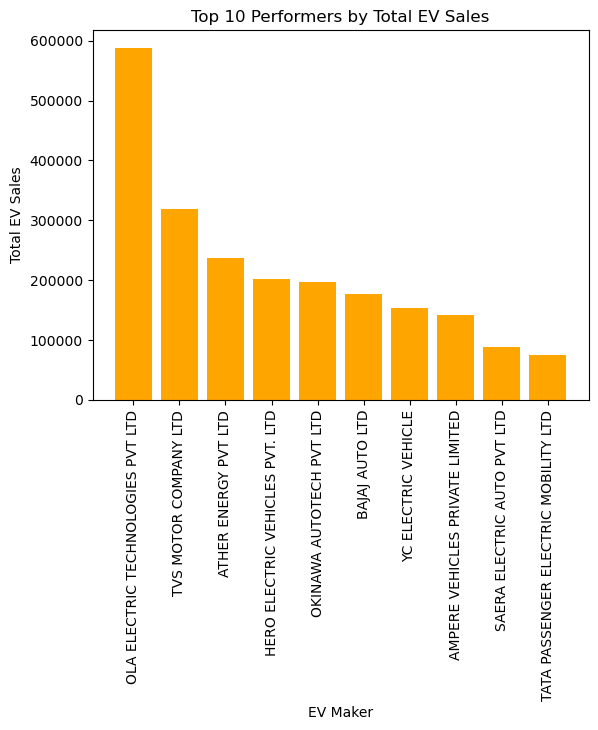

In [28]:
plt.bar(top_10_performers['Maker'], top_10_performers['Total Sales'], color = 'orange')

plt.title('Top 10 Performers by Total EV Sales')
plt.xlabel('EV Maker')
plt.ylabel('Total EV Sales')
plt.xticks(rotation = 90)
plt.show()

**Assumptions for the success of these companies**
* The top companies having the highest sales might have provided many features in their evs
* These evs might be at affordable price with maximum features
* Companies like TVS, Hero Electric, and Bajaj are well know since years, so people might have purchased evs from these companies
* Ola electric has the highest market share, it started since 2021 and it's sales are drastically increasing, it is well known for it's innovative technologies. This is might be because of it's evs are affordable and have max features.
* Ola electric is having the highest no.of 2W sales in every year since 2022 (the year after it started manufacturing evs), it might become the top 1 company in manufacturing evs


# Price vs Features

**Asumptions**
* As there is no particular information about the price of evs and also the features of evs in any of the datasets, generally I think that if an ev has many features, then the price will also be high
* Few companies which are just starting the manufacture of evs might give the featured evs at affordable price, so that people get familiar with their evs and can reach to many people
* Price and features of evs are highly co-related

# Impact of Government Policies

**Asumptions**
* Government of India has brought many policies on Electric Vehicles to speard awareness about evs and aims for sustainability
* These policies had a great impact on ev sales.
* Making the evs at affordable prices, and few policies where even lower-middle-class people can buy evs are few examples of 'Impact of Government Policies' on ev sales and ev awareness spread

# Geographical Analysis

In [29]:
ev_maker.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [30]:
#counting no.of ev manufacturing plants that are located in each state
state_count = ev_maker[['State','EV Maker']].groupby('State').count()
state_count

,EV Maker
State,
Andhra Pradesh,1
Delhi,4
Gujarat,5
Haryana,6
Karnataka,6
Madhya Pradesh,1
Maharashtra,15
Punjab,1
Rajasthan,4


In [31]:
#sorting the states based on their count of plants located and extracting top 5 states
state_count.sort_values('EV Maker', ascending = False).head()

,EV Maker
State,
Maharashtra,15
Tamil Nadu,11
Haryana,6
Karnataka,6
Gujarat,5


In [32]:
op_pcs.head()

,State,No. of Operational PCS
0,Andaman & Nicobar,3
1,Andhra Pradesh,327
2,Arunachal Pradesh,9
3,Assam,86
4,Bihar,124


In [33]:
# Checking states with highest no.of Public Charging Stations installed
highest_pcs = op_pcs.sort_values('No. of Operational PCS', ascending = False).head(5)
highest_pcs

,State,No. of Operational PCS
19,Maharashtra,3079
8,Delhi,1886
15,Karnataka,1041
16,Kerala,852
28,Tamil Nadu,643


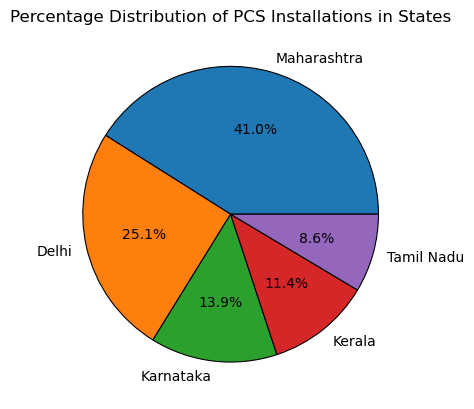

In [34]:
plt.pie(highest_pcs['No. of Operational PCS'], labels = highest_pcs['State'], 
        wedgeprops = {'edgecolor':'black','linewidth':0.8}, autopct = "%1.1f%%")

plt.title('Percentage Distribution of PCS Installations in States')
plt.show()

**Assumptions**
* Maharastra has the highest no.of ev manufacturing plants and public charging stations installed. Based on the PCS count, we can say that more people in maharastra are using evs 
* All the top 5 states that are having more no.of ev plants also have more no.of PCS installed
* Delhi has 4 ev manufacturing plants and 2nd highest PCS count, by this we can say that more people in delhi are also using evs. The PCS count is high, this might be because the state is very big and we find most of the people in delhi with vehicles


# Environmental Imapct

**Assumptions**
* Adoptation to evs reduce air pollution, and slowly leads to sustainable environment to some extent
* As we know the air pollution and release of greenhouse gases are mostly because of fuel vehicles, reducing the usage of fuel vehicles and adoptation to evs leads to reduce in greenhouse gases emission, and reduces global warming, the major environmental concern
* EVs run by battery, this energy can be generated by renewable energy resources, so adoptation to evs also helps in sustainable energy management